In [6]:
import cv2 as c
import matplotlib.pyplot as plt
import numpy as np

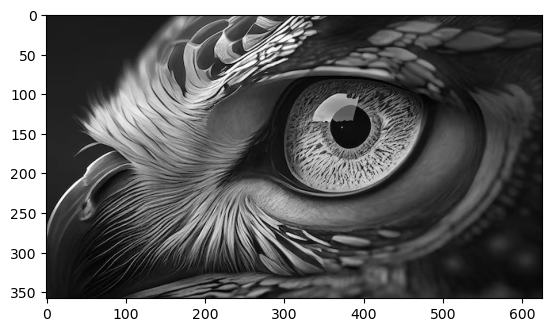

In [4]:
bgr=c.imread("image1.jpg")
rgb=c.cvtColor(bgr,c.COLOR_BGR2RGB)
img=c.cvtColor(rgb,c.COLOR_RGB2GRAY)
plt.imshow(img,cmap="gray")

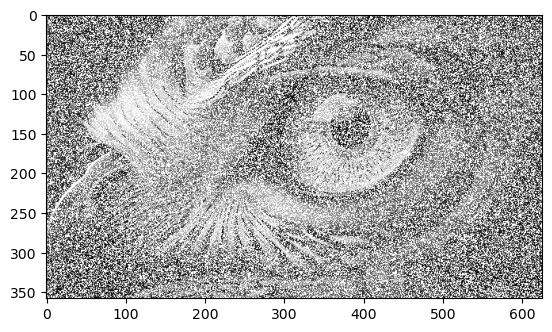

In [14]:
gaussian_noise = np.random.normal(0,10, img.shape).astype('uint8')
noisy_image = c.add(img, gaussian_noise)

plt.imshow(noisy_image,cmap="gray")

In [26]:
def wf(image, window_size=3):
    pad = window_size // 2
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)
    
    for i in range(pad, image.shape[0] - pad):
        for j in range(pad, image.shape[1] - pad):
            window = padded_image[i - pad:i + pad + 1, j - pad:j + pad + 1]
            filtered_image[i, j] = np.min(window)
    
    return filtered_image

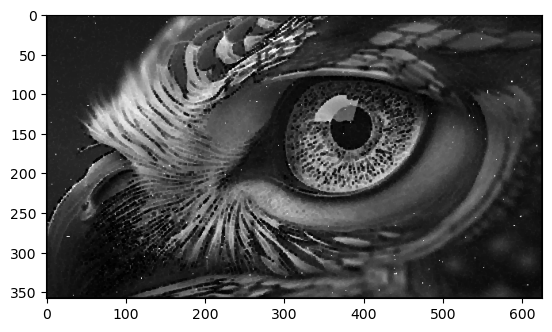

In [31]:
wei_fil=wf(noisy_image,3)
plt.imshow(wei_fil,cmap="gray")

In [112]:
def salt(image, salt_prob, pepper_prob):
    # Create a copy of the image to avoid modifying the original
    noisy_image = np.copy(image)
    
    # Generate random values for salt (255) and pepper (0)
    total_pixels = image.size
    num_salt = int(salt_prob * total_pixels)  # Number of salt pixels
    num_pepper = int(pepper_prob * total_pixels)  # Number of pepper pixels
    
    # Salt noise (set random pixels to 255)
    salt_coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255  # Set salt pixels to white (255)
    
    # Pepper noise (set random pixels to 0)
    pepper_coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0  # Set pepper pixels to black (0)
    
    return noisy_image


In [113]:
imh=salt(img,0.5,0.5)

In [114]:
def sm(img, kernel_size):
    height, width = img.shape
    sm_img = np.zeros_like(img)
    pad = kernel_size // 2
    for i in range(pad, height - pad):
        for j in range(pad, width - pad):
            kernel = img[i - pad:i + pad + 1, j - pad:j + pad + 1]
            kernel_mean = np.median(kernel)
            sm_img[i, j] = kernel_mean
    
    return sm_img

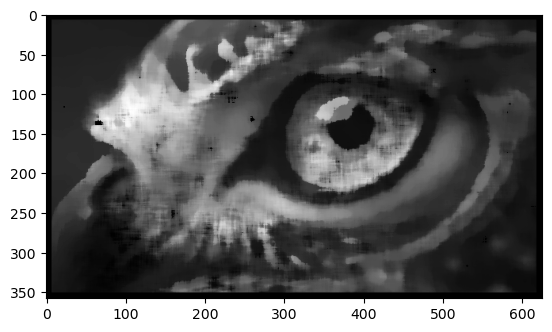

In [118]:
af1=sm(imh,15)
plt.imshow(af1,cmap='gray')

In [94]:
def convolution(image, kernel):

    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    
    gradient = np.zeros_like(image, dtype=np.float64)
    
    for i in range(image_height):
        for j in range(image_width):
            roi = padded_image[i:i+kernel_height, j:j+kernel_width]
            gradient[i, j] = np.sum(roi * kernel)
    
    return gradient

def sobel_edge_detection(image,w):
    if w==3:
        sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
        sobel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
    elif w==5:
        sobel_x=np.array([[-1,-2,0,2,1],[-2,-3,0,3,2],[-3,-5,0,5,3],[-2,-3,0,3,2],[-1,-2,0,2,1]])
        sobel_y=np.array([[1,2,3,2,1],[2,3,5,3,2],[0,0,0,0,0],[-2,-3,-5,-3,-2],[-1,-2,-3,-2,-1]])
    grad_x = convolution(image, sobel_x)
    grad_y = convolution(image, sobel_y)
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
    gradient_direction = np.arctan2(grad_y, grad_x)
    
    return gradient_magnitude, gradient_direction

image = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)

gradient_magnitude, gradient_direction = sobel_edge_detection(image,5)
gradient_magnitude1, gradient_direction1 = sobel_edge_detection(image,3)


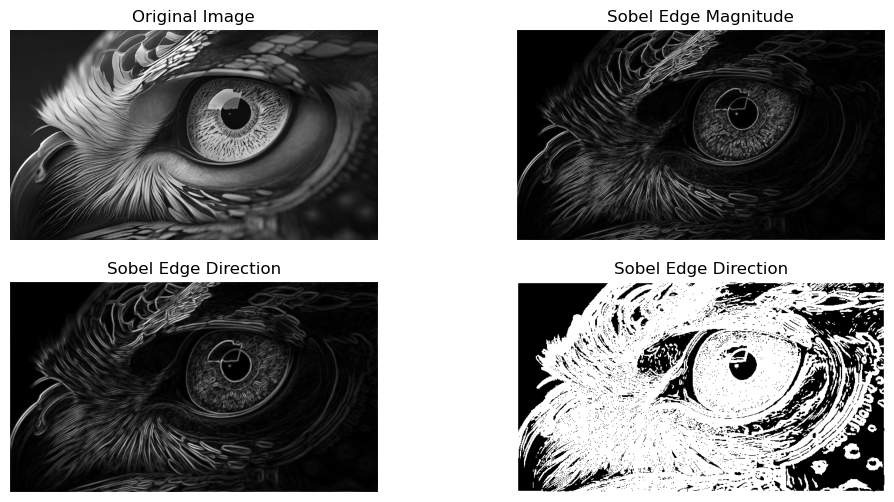

In [75]:
import numpy as np
import matplotlib.pyplot as plt

def convolution(image, kernel):
    # Get image and kernel dimensions
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Pad the image to handle borders
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    
    # Initialize output image for the gradient
    gradient = np.zeros_like(image, dtype=np.float64)
    
    # Convolve the image with the kernel
    for i in range(image_height):
        for j in range(image_width):
            # Get the region of interest (ROI) from the padded image
            roi = padded_image[i:i+kernel_height, j:j+kernel_width]
            # Perform element-wise multiplication and sum the result
            gradient[i, j] = np.sum(roi * kernel)
    
    return gradient

# Function to apply Sobel edge detection
def sobel_edge_detection(image,w):
    if w==3:
        sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
        sobel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
    elif w==5:
        sobel_x=np.array([[-1,-2,0,2,1],[-2,-3,0,3,2],[-3,-5,0,5,3],[-2,-3,0,3,2],[-1,-2,0,2,1]])
        sobel_y=np.array([[1,2,3,2,1],[2,3,5,3,2],[0,0,0,0,0],[-2,-3,-5,-3,-2],[-1,-2,-3,-2,-1]])
    # Apply Sobel convolution for the x and y gradients
    grad_x = convolution(image, sobel_x)
    grad_y = convolution(image, sobel_y)
    
    # Compute the gradient magnitude (edge strength)
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
    # Optionally, compute the gradient direction (edge orientation)
    gradient_direction = np.arctan2(grad_y, grad_x)  # in radians
    
    return gradient_magnitude, gradient_direction

# Load the image and convert it to grayscale
image = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Sobel edge detection
gradient_magnitude, gradient_direction = sobel_edge_detection(image,5)
gradient_magnitude1, gradient_direction1 = sobel_edge_detection(image,3)
# Display the original image and Sobel results
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gradient_magnitude1, cmap='gray')
plt.title('Sobel Edge Magnitude')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Sobel Edge Direction')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(trim, cmap='gray')
plt.title('Sobel Edge Direction')
plt.axis('off')

plt.show()


In [87]:
def trin(image,tre):
    b_img=np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j]>tre:
                b_img[i,j]=255
            else:
                b_img[i,j]=0
    return b_img

In [92]:
trim=trin(gradient_magnitude,300)

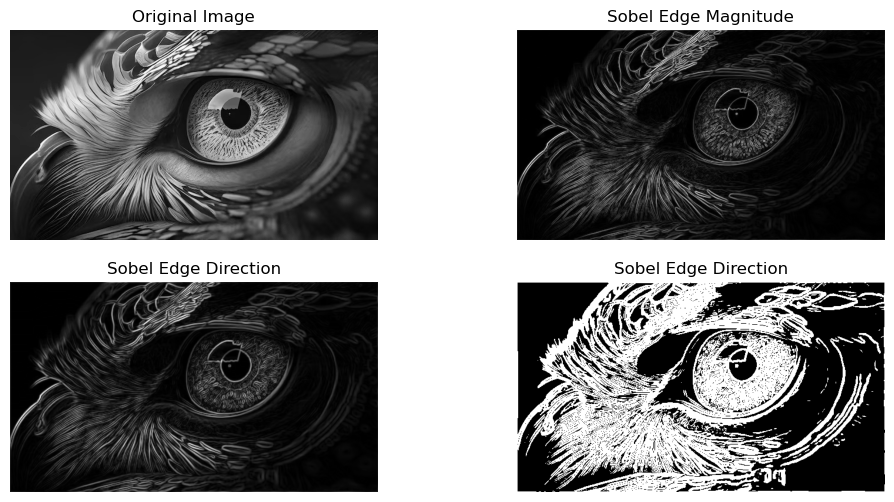

In [93]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gradient_magnitude1, cmap='gray')
plt.title('Sobel Edge Magnitude')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Sobel Edge Direction')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(trim, cmap='gray')
plt.title('Sobel Edge Direction')
plt.axis('off')

plt.show()

In [96]:
def nms(gradient_magnitude, gradient_direction):
    # Get the image size
    height, width = gradient_magnitude.shape
    
    # Initialize the output image with the same size
    output = np.zeros_like(gradient_magnitude)
    
    # Loop through every pixel in the image (excluding borders)
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Get the gradient direction in degrees (0, 45, 90, 135)
            angle = gradient_direction[i, j] * 180.0 / np.pi  # Convert to degrees
            angle = angle % 180  # Ensure it's in [0, 180)
            
            # Nearest horizontal (0° or 180°)
            if (0 <= angle < 22.5) or (157.5 <= angle < 180):
                neighbor1 = gradient_magnitude[i, j-1]
                neighbor2 = gradient_magnitude[i, j+1]
            # Nearest vertical (90°)
            elif (22.5 <= angle < 67.5):
                neighbor1 = gradient_magnitude[i-1, j]
                neighbor2 = gradient_magnitude[i+1, j]
            # Nearest 45° diagonal
            elif (67.5 <= angle < 112.5):
                neighbor1 = gradient_magnitude[i-1, j-1]
                neighbor2 = gradient_magnitude[i+1, j+1]
            # Nearest 135° diagonal
            else:
                neighbor1 = gradient_magnitude[i+1, j-1]
                neighbor2 = gradient_magnitude[i-1, j+1]
            
            # Suppress non-maximums
            if (gradient_magnitude[i, j] >= neighbor1) and (gradient_magnitude[i, j] >= neighbor2):
                output[i, j] = gradient_magnitude[i, j]
            else:
                output[i, j] = 0  # Suppress
    
    return output

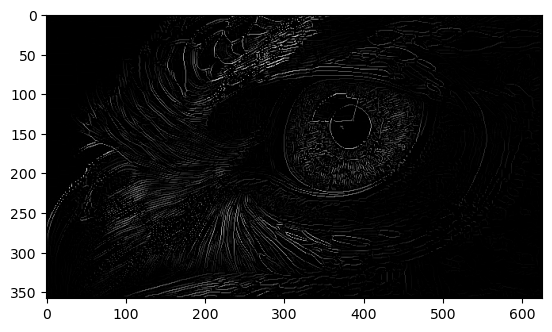

In [97]:
fim=nms(gradient_magnitude, gradient_direction)
plt.imshow(fim, cmap='gray')